In [271]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Document to Vector
import re
from time import time
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split

#Model 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [2]:
train_df=pd.read_csv(r'D:\OneDrive - Northeastern University\Northeastern University\Courses\CS 6120 Natural Language Processing\Project\Legal Documents Classification\Data\train.csv',index_col=0)
test_df=pd.read_csv(r'D:\OneDrive - Northeastern University\Northeastern University\Courses\CS 6120 Natural Language Processing\Project\Legal Documents Classification\Data\test.csv',index_col=0)

In [3]:
train_df['flag']='train'
test_df['flag']='test'
all_data_df=pd.concat([train_df,test_df])

In [5]:
all_data_df.shape

(8419, 12)

In [7]:
all_data_df['text']=all_data_df['text'].fillna("")

In [10]:
print(all_data_df['text'].apply(lambda x: len(x.split(' '))).sum())

57798628


In [12]:
all_data_df.columns

Index(['issue', 'n_min_votes', 'case_name', 'maj_opinion_author',
       'decision_date', 'decision_direction', 'n_maj_votes', 'us_cite_id',
       'argument_date', 'text', 'issue_area', 'flag'],
      dtype='object')

In [62]:
data_df=all_data_df[['issue','issue_area','flag','text']]

In [63]:
data_df

,issue,issue_area,flag,text
3026,30130.0,3,train,"]\n, 269]\n Sol. Gen. Erwin N. Griswold, for a..."
214,90380.0,9,train,Appeal from the Supreme Court of the State of ...
4817,100030.0,10,train,"When Army Sergeant Ridgway and his first wife,..."
4099,10120.0,1,train,"Respondent was arrested, arraigned, and commit..."
547,20250.0,2,train,1. Petitioners are veterans entitled to the be...
...,...,...,...,...
1175,NaN,-1,test,"7 Ill. 2d 138, 130 N. E. 2d 187, affirmed by a..."
5312,10090.0,1,test,Section 12(f) of the Military Selective Servic...
5214,10050.0,1,test,Acting pursuant to warrants issued on a showin...
1864,80220.0,8,test,Appellee railroad operates trains solely withi...


In [64]:
#checking missing values
data_df.isnull().sum()

issue         23
issue_area     0
flag           0
text           0
dtype: int64

In [65]:
data_df['issue']=data_df['issue'].replace(np.nan,'-1')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
#checking missing values
data_df.isnull().sum()

issue         0
issue_area    0
flag          0
text          0
dtype: int64

In [67]:
#changing data type
data_df['issue'] = data_df['issue'].astype(int)
data_df['text'] = data_df['text'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
def cleanText(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]"," ",words)
    text = words.lower().split()
    return " ".join(text)

In [70]:
data_df['text']=data_df['text'].apply(cleanText)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
stop = stopwords.words('english')
lem = WordNetLemmatizer()


def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def word_lem(text):
    """The function to apply lemmatizing"""
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [73]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [74]:
data_df['text']=data_df['text'].apply(remove_stopwords)
data_df['text']=data_df['text'].apply(word_lem)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
data_df['text'] = data_df['text'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
print(data_df['text'].apply(lambda x: len(x.split(' '))).sum())

31567800


In [79]:
#save clean data
data_df.to_csv(r'D:\OneDrive - Northeastern University\Northeastern University\Courses\CS 6120 Natural Language Processing\Project\Legal Documents Classification\Data\clean_data.csv', encoding='utf-8')

## Data Preparation

In [87]:
issue_codes=pd.read_csv(r'D:\OneDrive - Northeastern University\Northeastern University\Courses\CS 6120 Natural Language Processing\Project\Legal Documents Classification\Data\issue_codes.csv',index_col=0)

In [89]:
issue_label=np.arange(len(issue_codes['code']))

In [92]:
issue_codes['issue_label']=issue_label

In [96]:
issue_codes=issue_codes[['code','issue_label']]

In [101]:
data_df=data_df.merge(issue_codes,how='left',left_on='issue',right_on='code')

In [98]:
data_df.shape

(8419, 4)

In [103]:
data_df=data_df.drop(columns=['code'])
data_df.head()

,issue,issue_area,flag,text,issue_label
0,30130,3,train,sol gen erwin n griswold appellant john g flym...,146.0
1,90380,9,train,appeal supreme court state oklahoma messrs rob...,263.0
2,100030,10,train,army sergeant ridgway first wife april granted...,2.0
3,10120,1,train,respondent arrested arraigned committed jail d...,24.0
4,20250,2,train,petitioner veteran entitled benefit veteran pr...,117.0


In [104]:
data_df['issue_label']=data_df['issue_label'].replace(np.nan,'-1')
data_df['issue_label'] = data_df['issue_label'].astype(int)

In [257]:
issue_area_code=pd.read_csv(r'D:\OneDrive - Northeastern University\Northeastern University\Courses\CS 6120 Natural Language Processing\Project\Legal Documents Classification\Data\issue_area_code.csv',index_col=0)

In [258]:
issue_area_code['Issue_Area_Label']=issue_area_code['Issue_Area_Label'].replace(np.nan,'No Category')

In [282]:
index=list(issue_area_code['Issue_Area_Label'])

In [106]:
train_data_df=data_df[data_df['flag']=='train']
test_data_df=data_df[data_df['flag']=='test']

In [109]:
train_data_df.shape

(6735, 5)

In [110]:
test_data_df.shape

(1684, 5)

In [112]:
train_data_df.head()

,issue,issue_area,flag,text,issue_label
0,30130,3,train,sol gen erwin n griswold appellant john g flym...,146
1,90380,9,train,appeal supreme court state oklahoma messrs rob...,263
2,100030,10,train,army sergeant ridgway first wife april granted...,2
3,10120,1,train,respondent arrested arraigned committed jail d...,24
4,20250,2,train,petitioner veteran entitled benefit veteran pr...,117


#### Creatting Tagged Documents  with issue label

In [165]:
train_tag = train_data_df.apply(lambda x: TaggedDocument(words=word_tokenize(x['text']), tags=[x.issue_area]), axis=1)

test_tag = test_data_df.apply(lambda x: TaggedDocument(words=word_tokenize(x['text']), tags=[x.issue_area]), axis=1)

#### Doc2Vec Model

In [166]:
doc_model = Doc2Vec(dm=0,vector_size=300, window=10, min_count=5, workers=4, alpha=0.025, min_alpha=0.005, sample = 0)
               
doc_model.build_vocab(train_tag)

In [167]:
doc_model.corpus_total_words

25326958

In [168]:
doc_model.train(train_tag, total_examples=doc_model.corpus_count, epochs=30)

In [169]:
#save model
doc_model.save(r'D:\OneDrive - Northeastern University\Northeastern University\Courses\CS 6120 Natural Language Processing\Project\Legal Documents Classification\Models\model.doc2vec')

#### Get Vector from the Doc2Vec Model

In [170]:
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, feature_vectors

In [171]:
y_train, X_train = vector_for_learning(doc_model, train_tag)
y_test, X_test = vector_for_learning(doc_model, test_tag)

## Modeling

## Logistic Regression

In [172]:
model_lr = LogisticRegression(multi_class = 'multinomial',class_weight='balanced', solver = 'lbfgs', max_iter = 2000)
model_lr.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)

In [173]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred_lr))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred_lr, average='weighted')))

Testing accuracy 0.747624703087886
Testing F1 score: 0.7498067855254563


In [242]:
ytest = np.array(y_test)
report=classification_report(ytest, y_pred_lr,target_names=index)
print(report)

                      precision    recall  f1-score   support

         No Category       0.33      1.00      0.50         4
  Criminal Procedure       0.85      0.84      0.85       377
        Civil Rights       0.73      0.70      0.71       267
     First Amendment       0.84      0.83      0.84       153
         Due Process       0.59      0.63      0.61        70
             Privacy       0.60      0.60      0.60        15
           Attorneys       0.70      0.74      0.72        19
              Unions       0.66      0.80      0.72        55
   Economic Activity       0.80      0.75      0.78       346
      Judicial Power       0.63      0.65      0.64       234
          Federalism       0.51      0.60      0.55        65
Interstate Relations       0.90      0.75      0.82        12
    Federal Taxation       0.85      0.80      0.82        64
       Miscellaneous       0.50      0.33      0.40         3

            accuracy                           0.75      1684
      

In [248]:
report=pd.DataFrame(classification_report(ytest, y_pred_lr,target_names=index,output_dict=True)).transpose()

In [249]:
report.to_csv(r'D:\OneDrive - Northeastern University\Northeastern University\Courses\CS 6120 Natural Language Processing\Project\Legal Documents Classification\output\classification_report.csv')

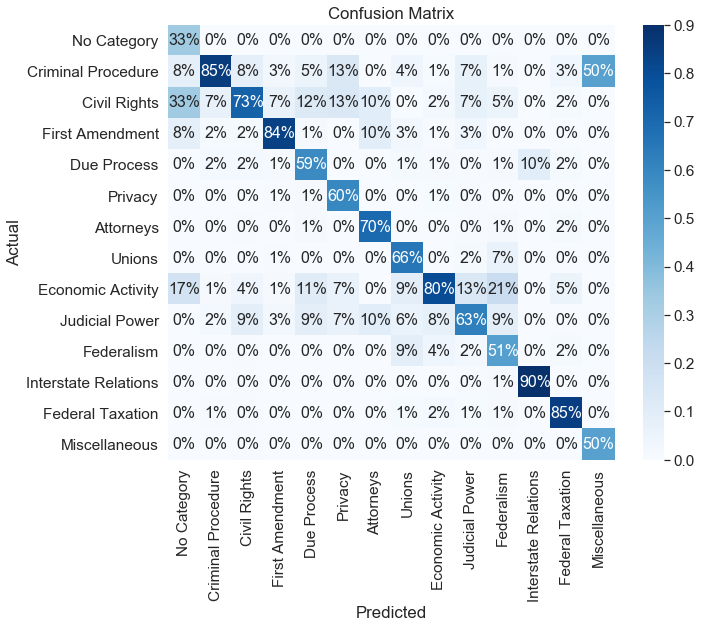

In [292]:
## confusion matrix
data = confusion_matrix(ytest, y_pred_lr)
df_cm = pd.DataFrame(data, columns=index, index =index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm/np.sum(df_cm), cmap="Blues", annot=True,annot_kws={"size": 16},fmt='.0%')
plt.title('Confusion Matrix')
plt.savefig('..\output\confusion_matrix.png')